# 1. Libraries and Data
In this first section I import the data into the work space, and give it the necessary format to be used during the stochastic modeling process.

In [95]:
# Libraries
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import matplotlib as mlp
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%load_ext autoreload
%autoreload 2
import stochastic_modeling as stc


mlp.style.use('seaborn-notebook')
sns.set(font_scale=1.1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
full_rates = pd.read_csv('historico_tasas_python.csv',index_col=0).astype(
    {'Fecha':'datetime64[ns]'}
).set_index('Fecha', drop=True)
full_rates

,TIBR,IBR Overnight,IBR 1M,IBR 3M,IBR 6M,DTF,IPC Anual,IPC Mensual,FED,UVR,...,IBC,USURA,TRM,DEV. TRM,LIBOR,SOFR,LEMPIRA/USD,DEV. LEMPIRA,COLON/USD,DEV. COLON
Fecha,,,,,,,,,,,,,,,,,,,,,
1999-01-01,0.26,NaN,NaN,NaN,NaN,0.3433,0.1635,0.0017,NaN,NaN,...,0.4549,0.68235,1542.11,0.192126,NaN,NaN,NaN,NaN,271.65,0.110907
1999-01-02,0.26,NaN,NaN,NaN,NaN,0.3433,0.1635,0.0017,NaN,NaN,...,0.4549,0.68235,1542.11,0.192126,NaN,NaN,NaN,NaN,271.65,0.110907
1999-01-03,0.26,NaN,NaN,NaN,NaN,0.3433,0.1635,0.0017,NaN,NaN,...,0.4549,0.68235,1542.11,0.182300,NaN,NaN,NaN,NaN,271.65,0.110680
1999-01-04,0.26,NaN,NaN,NaN,NaN,0.3406,0.1635,0.0017,NaN,NaN,...,0.4549,0.68235,1542.11,0.182300,NaN,NaN,NaN,NaN,271.65,0.110680
1999-01-05,0.26,NaN,NaN,NaN,NaN,0.3406,0.1635,0.0017,NaN,NaN,...,0.4549,0.68235,1545.11,0.184601,NaN,NaN,NaN,NaN,271.85,0.111497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-05,0.02,0.01980,0.02039,0.02430,0.03000,0.0204,0.0444,0.0045,0.0025,286.3298,...,0.1708,0.25620,3786.05,-0.024666,0.001551,0.0005,24.2507,-0.014644,629.65,0.040916
2021-10-06,0.02,0.01976,0.02060,0.02456,0.03043,0.0204,0.0451,0.0038,0.0025,286.3726,...,0.1708,0.25620,3796.30,-0.012345,0.001561,0.0005,24.2507,-0.014536,629.12,0.041710
2021-10-07,0.02,0.01975,0.02048,0.02460,0.03038,0.0204,0.0451,0.0038,0.0025,286.4155,...,0.1708,0.25620,3788.03,-0.010123,0.001559,0.0005,24.2507,-0.014239,630.13,0.040351


In [87]:
monthly_rates = full_rates.groupby(pd.Grouper(freq='M')).last()

In [96]:
trm_gbm = stc.GBMRateSeries(trm,Np=10000, Nt=60, T=60, u_bound=9000)

(<Figure size 1080x720 with 1 Axes>, <AxesSubplot:>)

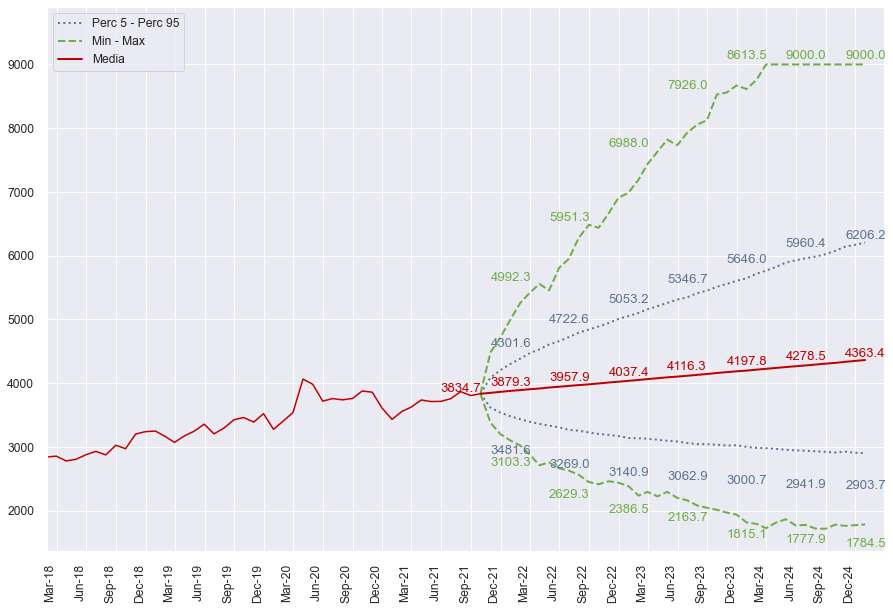

In [97]:
trm_gbm.plot_full_series('2018-01-01','2024-12-31')

(<Figure size 1800x720 with 1 Axes>, <AxesSubplot:>)

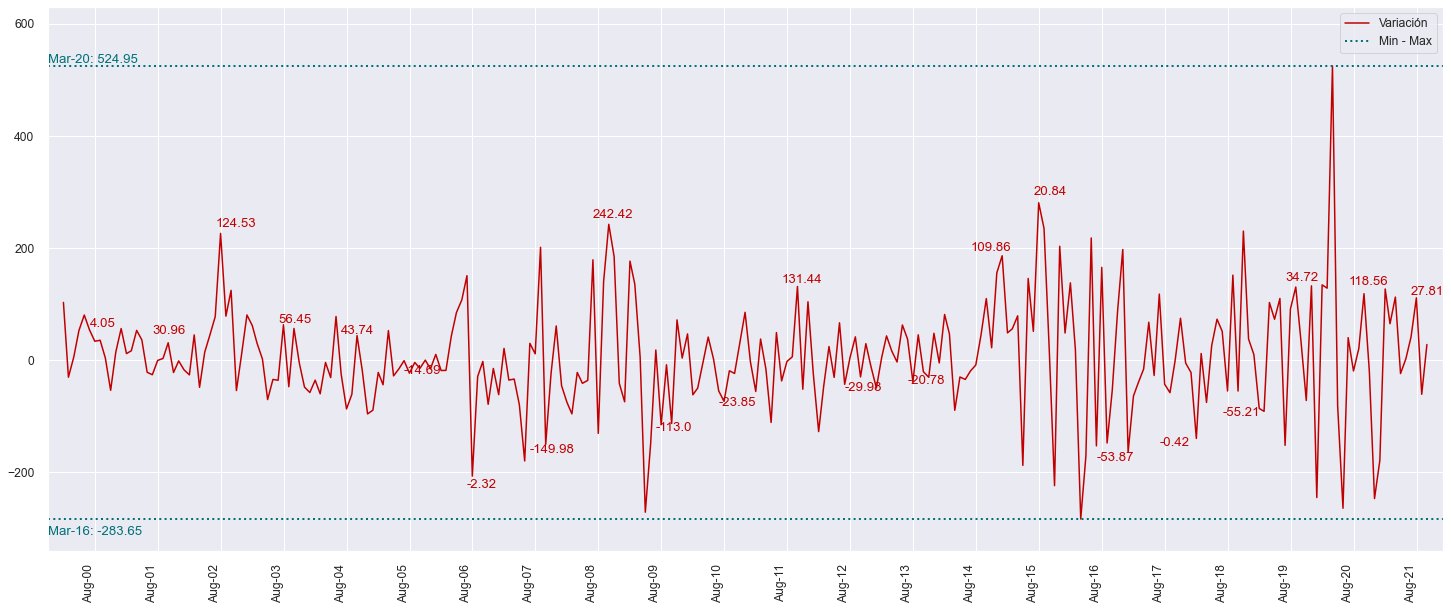

In [98]:
trm_gbm.plot_historic_variation(month_space=3, figsize=(25,10))

(<Figure size 1800x720 with 1 Axes>, <AxesSubplot:>)

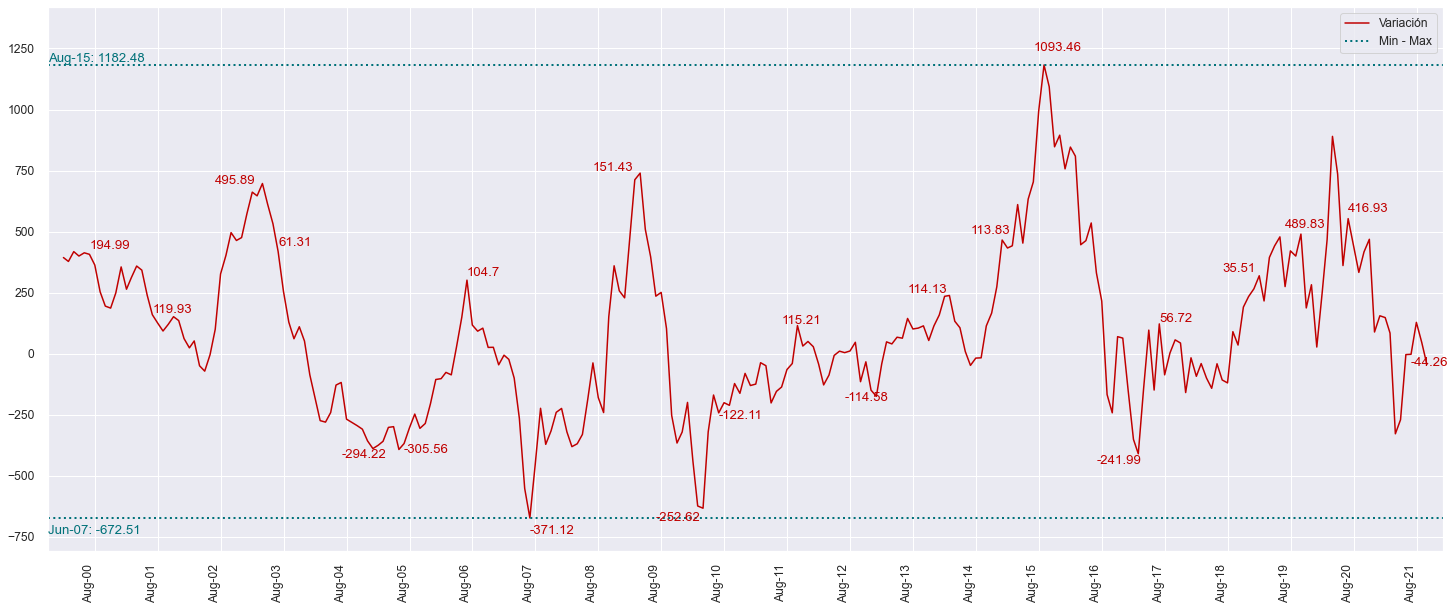

In [99]:
trm_gbm.plot_historic_variation(month_space=3, figsize=(25,10), ref=12)

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

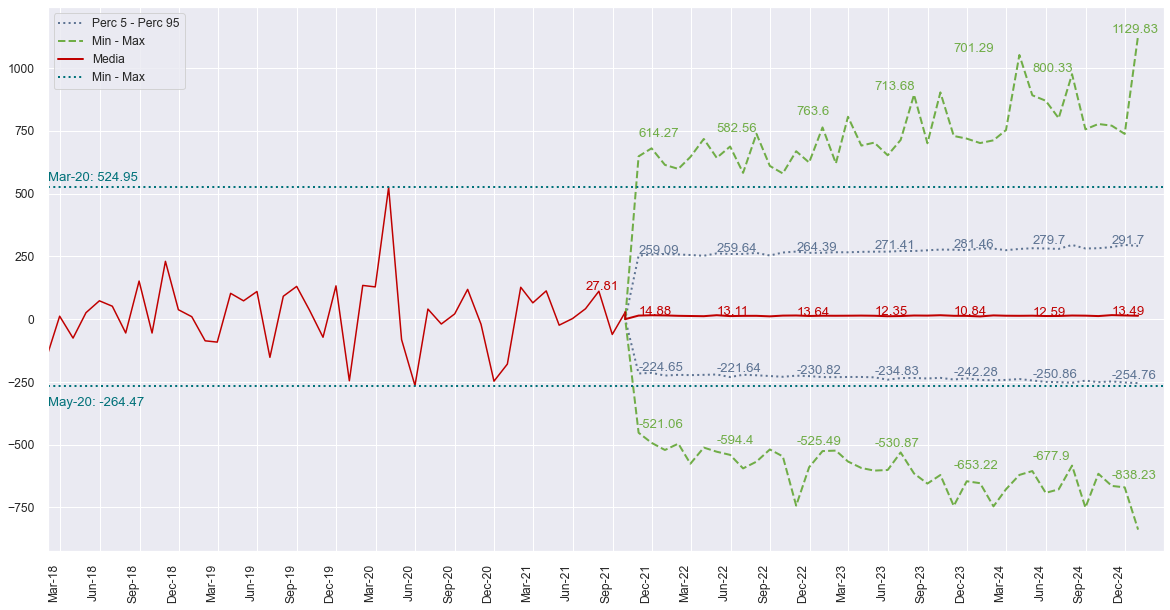

In [100]:
trm_gbm.plot_full_variations('2018-01-01', '2024-12-31', figsize=(20,10), dec=2)

In [101]:
np.log(trm/trm.shift(1)).agg(['min','mean','max', np.std])

min    -0.112046
mean    0.003253
max     0.138280
std     0.037212
Name: TRM, dtype: float64

(<Figure size 1440x720 with 1 Axes>, <AxesSubplot:>)

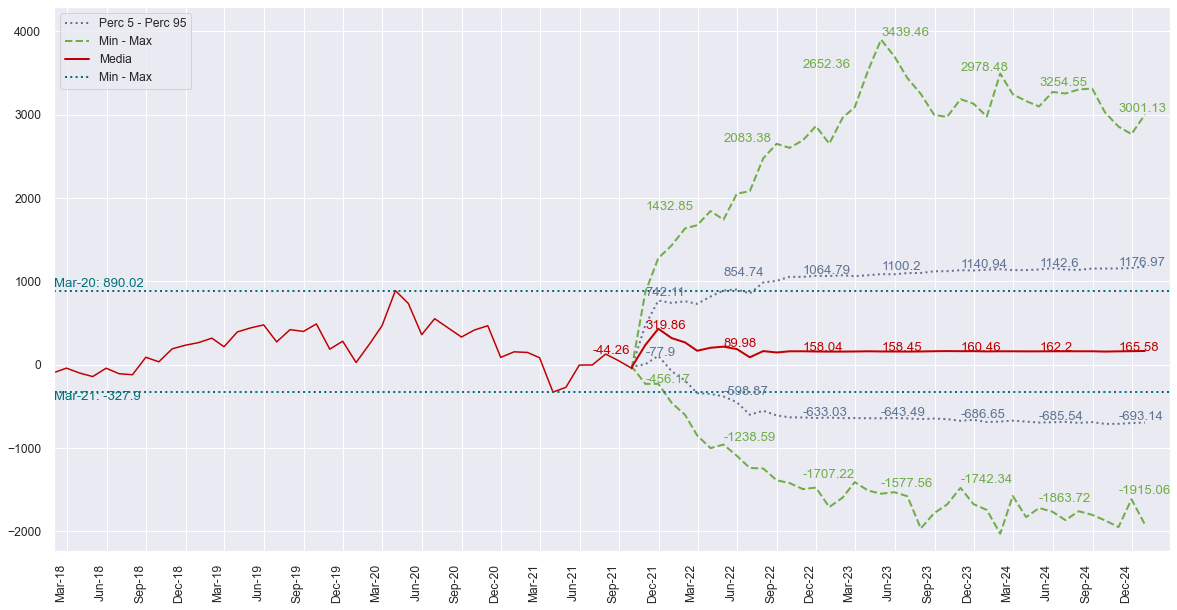

In [102]:
trm_gbm.plot_full_variations('2018-01-01', '2024-12-31', figsize=(20,10), ref=12, dec=2)

In [84]:
np.log(trm/trm.shift(1)).agg(['min','max','mean', 'std'])

min    -0.112046
max     0.138280
mean    0.003253
std     0.037212
Name: TRM, dtype: float64

<AxesSubplot:>

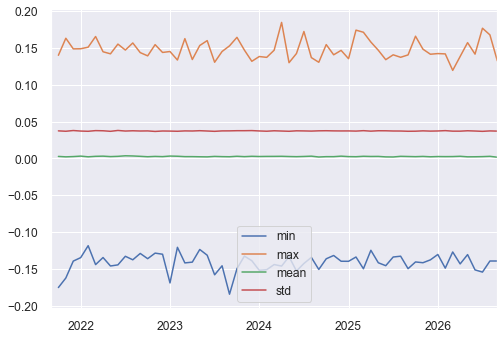

In [85]:
np.log(trm_gbm.sim_df/trm_gbm.sim_df.shift(1)).agg(['min','max','mean', 'std'], axis=1).plot()

In [29]:
trm_gbm.sim_df

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-09-30,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,...,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000
2021-10-31,3940.241312,4069.381346,4050.744576,3939.770528,3884.992783,3922.566265,4074.092099,3797.667502,3690.605862,3945.590183,...,4081.431614,4076.453331,3662.485604,3767.312146,3655.993802,3643.874234,3852.540147,3926.316059,3798.255342,3503.276802
2021-11-30,4060.906772,4089.467601,3990.520387,4023.919336,4063.333711,3791.887564,4282.509623,3864.659388,3639.010974,3841.209825,...,4129.805158,3684.727352,3616.743394,3962.418477,3595.223271,3516.173184,4141.682933,3977.489818,3655.192443,3356.545723
2021-12-31,4119.404120,4197.452498,4036.856334,4435.534673,4062.934826,4032.896183,4658.479319,3883.095769,3689.358910,3906.391975,...,4289.643444,3863.267961,3506.544791,3870.292763,3666.967157,3536.534898,4176.740849,3902.446840,3601.992100,3415.197865
2022-01-31,4319.663714,4233.638053,3997.748096,4277.810937,3991.751754,3897.599947,4888.489450,3787.250897,3839.789605,3911.010273,...,4091.604533,4046.768689,3472.424477,3792.240536,3730.751701,3512.575984,4088.297827,3903.292484,3356.926181,3288.904195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-05-31,4304.488250,7160.871212,4973.192113,7425.892950,3746.632631,6567.132179,5409.269880,3458.291134,6361.352911,3388.971761,...,5619.933470,5053.036726,4715.661258,3580.794113,5157.605966,4606.155815,4503.768542,4017.757399,2653.594811,4998.945558
2026-06-30,4623.074875,7283.787118,4772.209004,7354.357415,3654.892807,6562.986786,5326.037923,3424.596300,6946.532695,3538.176100,...,5574.645181,5298.686087,4990.384120,3755.682969,5030.601331,4761.011172,4485.215075,4178.041410,2860.170378,5067.988079
2026-07-31,4859.641580,7230.359823,4853.827854,7290.345204,3849.874638,6930.527156,5047.914873,3403.311501,6981.579608,3630.619456,...,5505.406881,5090.132993,4755.305915,3905.733322,5225.921505,4622.339981,4454.215958,4272.878522,2871.897988,5136.347241
2026-08-31,4789.665389,7518.462457,4857.375215,7744.461104,3969.403232,6976.767490,4811.352822,3577.107680,7008.167987,3581.501467,...,5559.800051,4856.721459,4781.456867,3881.135071,5266.409482,4506.979256,4452.413775,4418.893088,3002.477270,5392.070370


In [40]:
trm_gbm.sim_df.loc[:,0].where(trm_gbm.sim_df.loc[:,0]<=9000,9000)

2021-09-30    3834.680000
2021-10-31    3940.241312
2021-11-30    4060.906772
2021-12-31    4119.404120
2022-01-31    4319.663714
                 ...     
2026-05-31    4304.488250
2026-06-30    4623.074875
2026-07-31    4859.641580
2026-08-31    4789.665389
2026-09-30    4881.914361
Name: 0, Length: 61, dtype: float64

In [41]:
trm_gbm.sim_df.apply(lambda x: x.where(x<=9000, 9000))


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-09-30,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,...,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000,3834.680000
2021-10-31,3940.241312,4069.381346,4050.744576,3939.770528,3884.992783,3922.566265,4074.092099,3797.667502,3690.605862,3945.590183,...,4081.431614,4076.453331,3662.485604,3767.312146,3655.993802,3643.874234,3852.540147,3926.316059,3798.255342,3503.276802
2021-11-30,4060.906772,4089.467601,3990.520387,4023.919336,4063.333711,3791.887564,4282.509623,3864.659388,3639.010974,3841.209825,...,4129.805158,3684.727352,3616.743394,3962.418477,3595.223271,3516.173184,4141.682933,3977.489818,3655.192443,3356.545723
2021-12-31,4119.404120,4197.452498,4036.856334,4435.534673,4062.934826,4032.896183,4658.479319,3883.095769,3689.358910,3906.391975,...,4289.643444,3863.267961,3506.544791,3870.292763,3666.967157,3536.534898,4176.740849,3902.446840,3601.992100,3415.197865
2022-01-31,4319.663714,4233.638053,3997.748096,4277.810937,3991.751754,3897.599947,4888.489450,3787.250897,3839.789605,3911.010273,...,4091.604533,4046.768689,3472.424477,3792.240536,3730.751701,3512.575984,4088.297827,3903.292484,3356.926181,3288.904195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-05-31,4304.488250,7160.871212,4973.192113,7425.892950,3746.632631,6567.132179,5409.269880,3458.291134,6361.352911,3388.971761,...,5619.933470,5053.036726,4715.661258,3580.794113,5157.605966,4606.155815,4503.768542,4017.757399,2653.594811,4998.945558
2026-06-30,4623.074875,7283.787118,4772.209004,7354.357415,3654.892807,6562.986786,5326.037923,3424.596300,6946.532695,3538.176100,...,5574.645181,5298.686087,4990.384120,3755.682969,5030.601331,4761.011172,4485.215075,4178.041410,2860.170378,5067.988079
2026-07-31,4859.641580,7230.359823,4853.827854,7290.345204,3849.874638,6930.527156,5047.914873,3403.311501,6981.579608,3630.619456,...,5505.406881,5090.132993,4755.305915,3905.733322,5225.921505,4622.339981,4454.215958,4272.878522,2871.897988,5136.347241
2026-08-31,4789.665389,7518.462457,4857.375215,7744.461104,3969.403232,6976.767490,4811.352822,3577.107680,7008.167987,3581.501467,...,5559.800051,4856.721459,4781.456867,3881.135071,5266.409482,4506.979256,4452.413775,4418.893088,3002.477270,5392.070370


In [33]:
trm_gbm.sim_df.loc[trm_gbm.sim_df>9000]

ValueError: Cannot index with multidimensional key

In [42]:
np.where(trm_gbm.sim_df.values>9000, 9000,trm_gbm.sim_df.values)

array([[3834.68      , 3834.68      , 3834.68      , ..., 3834.68      ,
        3834.68      , 3834.68      ],
       [3940.24131194, 4069.3813463 , 4050.74457613, ..., 3926.31605907,
        3798.25534172, 3503.27680168],
       [4060.90677177, 4089.46760072, 3990.52038679, ..., 3977.48981759,
        3655.1924432 , 3356.54572309],
       ...,
       [4859.64157992, 7230.35982304, 4853.82785425, ..., 4272.87852192,
        2871.89798828, 5136.34724066],
       [4789.66538869, 7518.46245695, 4857.3752153 , ..., 4418.8930883 ,
        3002.4772697 , 5392.07037043],
       [4881.91436098, 7469.4773195 , 4835.47500694, ..., 4262.83242363,
        3136.00642709, 5094.59993983]])

In [43]:
if None:
    print('A')
if 9: print('B')

B
